# Project 1: Concrete

## Concrete Strength Test


Data Set Information:

The data set includes 103 data points. There are 7 input variables, and 3 output variables in the data set.
The initial data set included 78 data. After several years, we got 25 new data points.


Attribute Information:

Input variables (7)(component kg in one M^3 concrete):
- Cement
- Slag
- Fly ash
- Water
- SP
- Coarse Aggr.
- Fine Aggr.

Output variables (3):
- SLUMP (cm)
- FLOW (cm)
- 28-day Compressive Strength (Mpa)

The focus of this analysis will be predicting the 28-day Compressive Strength (Mpa) of concrete by the input variables.



## 0. Setup Environment

Importing standard libraries and setting up graphics themes and settings 

In [1]:
## Import Required Libraries
import os
import pandas as pd 
import numpy as np

## Import Graphics Libraries 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Setup Colour Scheme 
sns.set_palette("tab10")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", palette="pastel",  rc=custom_params)

## Allows for multiple outputs from cells without having to repeatedly write display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Set the size of the plots 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # Note: 200 e.g. is really fine, but slower

from IPython import display

## Load & Inspect Data 

In [2]:
## function for importing data 
def load_data(file_name):
    csv_path = os.path.join(os.getcwd(), file_name)
    print(csv_path)
    return pd.read_csv(csv_path)

## import training and testing data 
concrete_data= load_data("slump_test.data")

c:\Users\david\Dropbox\00 MyFiles\03 UWA\01 Master of Data Science\03 Semester 1\CITS5508 Machine Learning\02 Tutorials\Lab4\slump_test.data


In [3]:
concrete_data.head(5)

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


## Null & Info Review 

There are no null values in the dataset. 


In [4]:
concrete_data.shape
concrete_data.info()

(103, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

In [5]:
def drop_cols(columns_to_drop):
    concrete_data.drop(columns=columns_to_drop , inplace=True)

drop_cols(["FLOW(cm)" ,"SLUMP(cm)" , "No"])
concrete_data.head(5)


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


## Exploritory Data Analysis. 

There does not seem to be much wrong with the data here.  
The high number of zero values are most likely testing the effect of the absence of one of the elements. 

The box plots show that there are no major outliers that need to be dealt with as only two seem to be evident in the strength and sp columns however. 

There are no correlations at a very high level that may cause multicollinearity in the regression model however this could be due to the high number of zero values. 
However in the pairs plot we can see that slag, fly ash, and cement seem to have some strong linear trends. The correlation values in the matrix may be lower than expected with the introduction of the zero values. These values may need to be treated in the analysis. 



In [6]:
concrete_data.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,58.530000


array([[<AxesSubplot:title={'center':'Cement'}>,
        <AxesSubplot:title={'center':'Slag'}>,
        <AxesSubplot:title={'center':'Fly ash'}>],
       [<AxesSubplot:title={'center':'Water'}>,
        <AxesSubplot:title={'center':'SP'}>,
        <AxesSubplot:title={'center':'Coarse Aggr.'}>],
       [<AxesSubplot:title={'center':'Fine Aggr.'}>,
        <AxesSubplot:title={'center':'Compressive Strength (28-day)(Mpa)'}>,
        <AxesSubplot:>]], dtype=object)

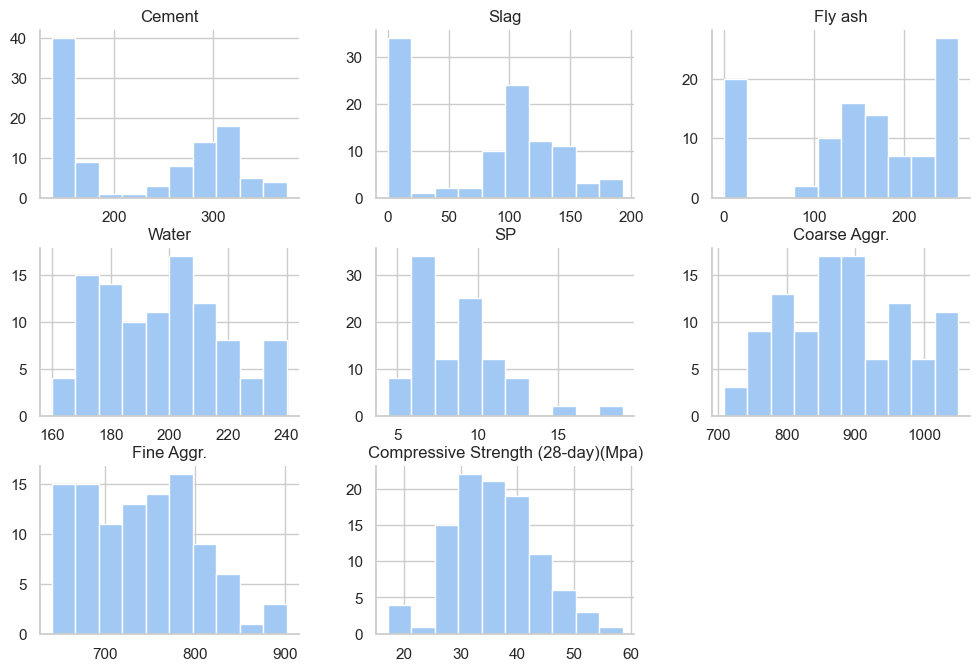

In [7]:
concrete_data.hist()

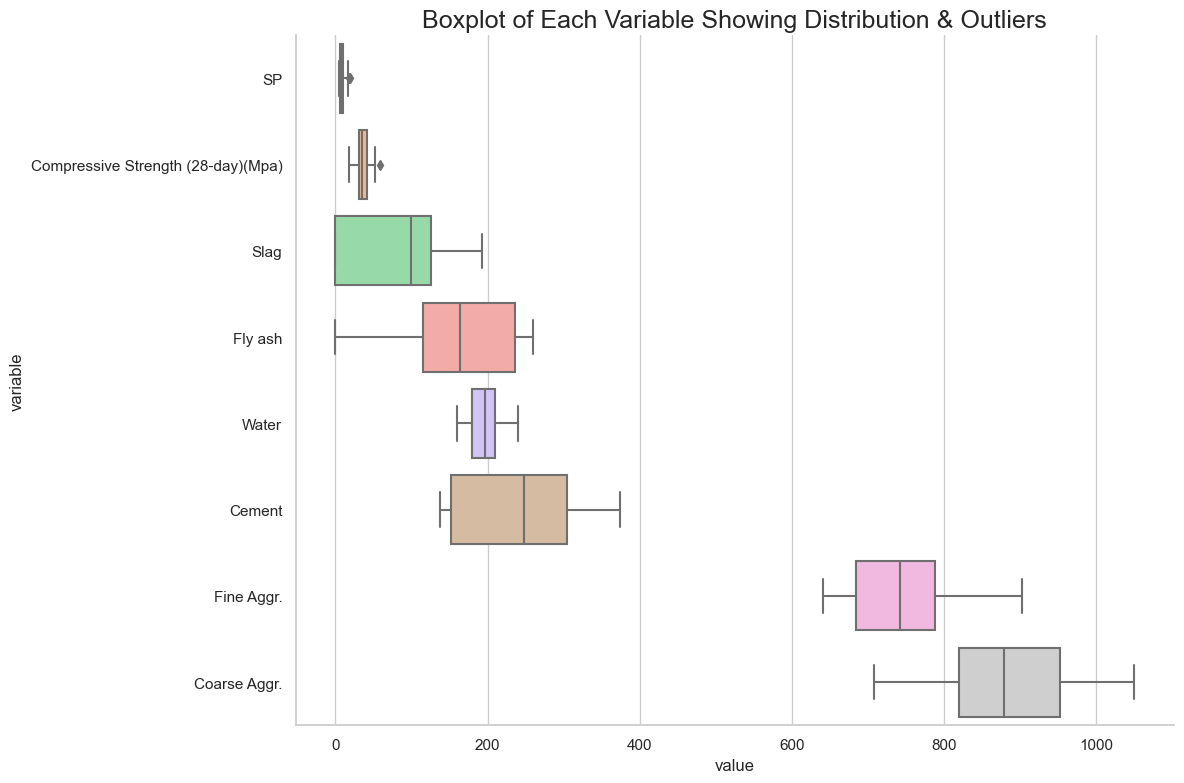

In [8]:
def plot_boxplot_for_vars( variables_to_plot: list , df: pd.DataFrame ):
    ## Convert from "Wide" to "Long" format 
    data_long = df[variables_to_plot].melt()

    ## Order the data by median value 
    my_order = data_long.groupby(by=["variable"])["value"].median().sort_values(ascending=False).iloc[::-1].index

    ## Plot the each variable 
    g = sns.boxplot(
        data=data_long, 
        x="value", 
        y="variable", 
        orient="h", 
        order=my_order
    )
    g.set_title("Boxplot of Each Variable Showing Distribution & Outliers" , fontsize=18)
    plt.tight_layout()
    plt.show()

plot_boxplot_for_vars(concrete_data.columns, concrete_data)

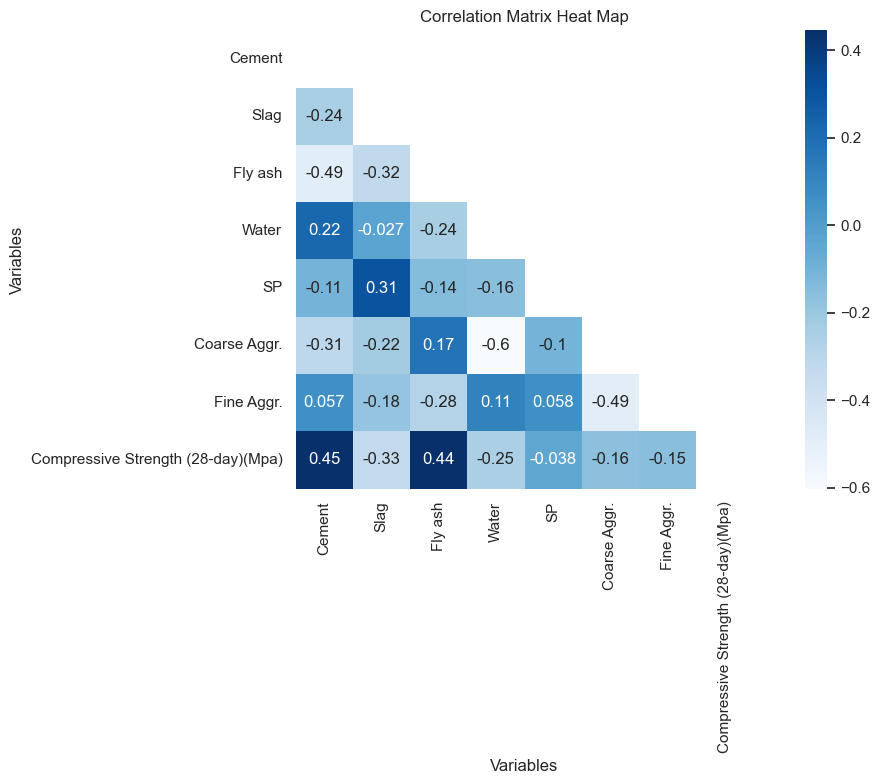

In [9]:
def plot_correlation_matrix(df: pd.DataFrame):
    # Plot Correlation Matrix 
    ## Calculate correlation between each pair of variable
    corr_matrix=df.corr() 

    # print(corr_matrix) ## No need to print as it is on the plot 

    ## Generate a mask for the upper triangle
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True

    ## Draw the heatmap with the mask
    plot = sns.heatmap(corr_matrix, 
        mask=mask, 
        square=True, 
        annot=True, 
        cmap="Blues"
    )

    ## Add titles and labels 
    plot.set_title("Correlation Matrix Heat Map")
    plot.set_ylabel("Variables")
    plot.set_xlabel("Variables")
    plt.tight_layout()
    plt.show()

    
plot_correlation_matrix(concrete_data)

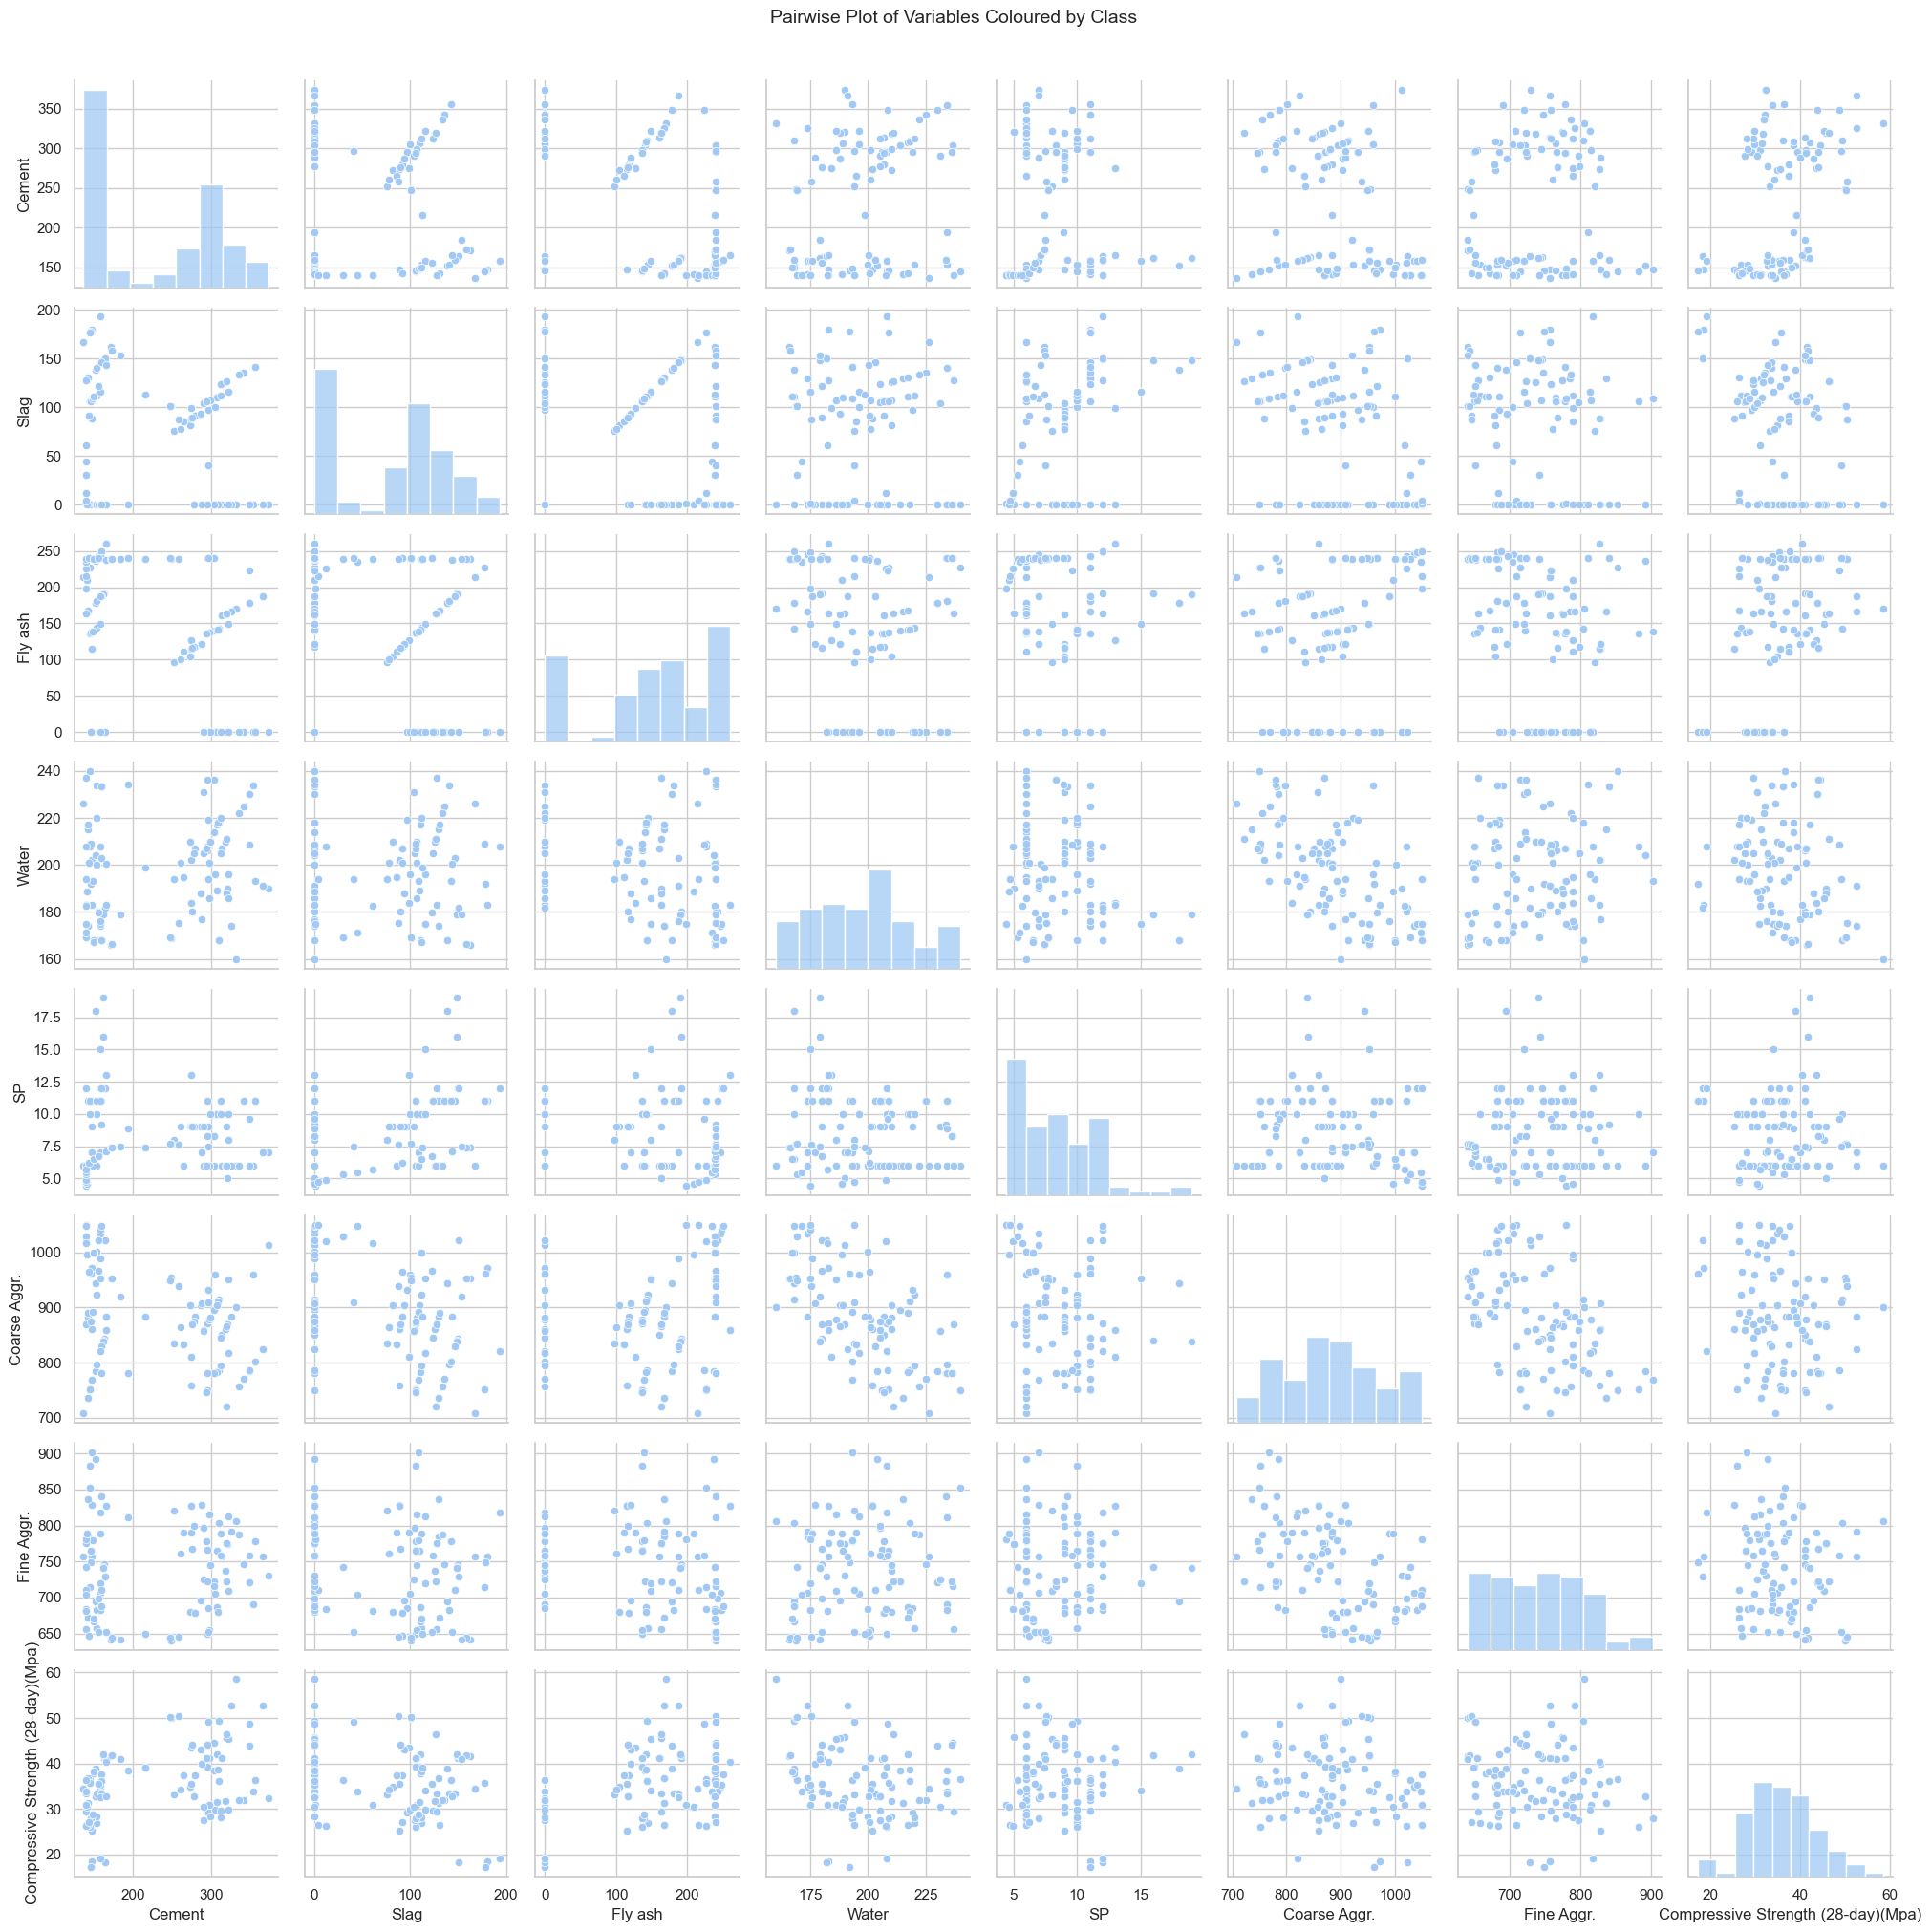

In [10]:
def plot_pairwise(df: pd.DataFrame):
    ## Create a Pairwise scatter plot to look for correlations 
    g = sns.pairplot(df,  height=2.5)
    g.add_legend()
    g.fig.suptitle("Pairwise Plot of Variables Coloured by Class" ,  y=1.01 , fontsize=14)
    plt.tight_layout()
    plt.show()

plot_pairwise(concrete_data)

## Extract Variables 

Allows for the easy use of these variables later

In [11]:
## Extract features and respond into variables 
strength_response = "Compressive Strength (28-day)(Mpa)"
strength_vars = [col for col in concrete_data if col != strength_response]


## Training Split 

80% training 20% testing split 

Ensure the x variables have been scaled 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(concrete_data[strength_vars],
                                                    concrete_data[strength_response],
                                                    test_size=0.2,
                                                    random_state=42)


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Create pipline 
trans_pipeline = Pipeline([
    ("scale_values" , StandardScaler())
])

## Apply to training data and testing data 
X_train_scaled = trans_pipeline.fit_transform(X_train[strength_vars])
X_test_scaled = trans_pipeline.transform(X_test[strength_vars])



## Modeling 


### Training 

Each model has been fit using the grid search with its respective hyperparameter. 

The Voting regressor has been trained with the same hyper parameters as the individual models - is ensure that we are comparing the best with th best. 


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV

svr_reg = LinearSVR()
lr_reg = LinearRegression()
sgd_reg = SGDRegressor()

voting_reg = VotingRegressor(estimators=[('svr_reg', svr_reg ),
                                         ('lr_reg', lr_reg ),
                                         ('sgd_reg', sgd_reg)
                                         ])


#Use the key for the classifier followed by __ and the attribute
params = {
    'svr_reg__C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
    'svr_reg__epsilon': [0.001, 0.01, 0.1, 1],
    'sgd_reg__alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],
    'sgd_reg__epsilon': [0.001, 0.01, 0.1, 1],
}

grid = GridSearchCV(estimator=voting_reg,
                    param_grid=params,
                    cv=5,
                    verbose=0,
                    scoring='neg_root_mean_squared_error')

grid.fit(X_train_scaled, y_train)

print(grid.best_params_)



C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\l

GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('svr_reg', LinearSVR()),
                                                   ('lr_reg',
                                                    LinearRegression()),
                                                   ('sgd_reg',
                                                    SGDRegressor())]),
             param_grid={'sgd_reg__alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],
                         'sgd_reg__epsilon': [0.001, 0.01, 0.1, 1],
                         'svr_reg__C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3,
                                        3.5, 4, 4.5, 5],
                         'svr_reg__epsilon': [0.001, 0.01, 0.1, 1]},
             scoring='neg_root_mean_squared_error')

{'sgd_reg__alpha': 0.001, 'sgd_reg__epsilon': 0.01, 'svr_reg__C': 2, 'svr_reg__epsilon': 1}


In [15]:
## Print best Parameters 
print("Best Hyperparameter Combinations: \n" , grid.best_params_ , "\n")

## Convert grid results to a data frame 
df = pd.DataFrame(grid.cv_results_).sort_values( by="rank_test_score")
df.head(5)

Best Hyperparameter Combinations: 
 {'sgd_reg__alpha': 0.001, 'sgd_reg__epsilon': 0.01, 'svr_reg__C': 2, 'svr_reg__epsilon': 1} 



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgd_reg__alpha,param_sgd_reg__epsilon,param_svr_reg__C,param_svr_reg__epsilon,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
263,0.002600,0.000490,0.000600,0.000490,0.001,0.01,2,1,"{'sgd_reg__alpha': 0.001, 'sgd_reg__epsilon': ...",-1.617763,-3.765629,-1.887290,-3.475913,-2.961410,-2.741601,0.851942,1
215,0.002800,0.000400,0.000400,0.000490,0.001,0.001,2,1,"{'sgd_reg__alpha': 0.001, 'sgd_reg__epsilon': ...",-1.619842,-3.766174,-1.883474,-3.478186,-2.963832,-2.742302,0.852809,2
311,0.002800,0.000400,0.000200,0.000400,0.001,0.1,2,1,"{'sgd_reg__alpha': 0.001, 'sgd_reg__epsilon': ...",-1.615060,-3.764844,-1.889279,-3.478779,-2.964401,-2.742472,0.852718,3
359,0.003401,0.000492,0.000600,0.000490,0.001,1,2,1,"{'sgd_reg__alpha': 0.001, 'sgd_reg__epsilon': ...",-1.621613,-3.765367,-1.887546,-3.477922,-2.964381,-2.743366,0.851313,4
167,0.003601,0.000489,0.000599,0.000489,0.0001,1,2,1,"{'sgd_reg__alpha': 0.0001, 'sgd_reg__epsilon':...",-1.620543,-3.766271,-1.888424,-3.478651,-2.963862,-2.743550,0.851734,5


#### Linear SVM Regressor 


In [16]:
from sklearn.svm import SVC, LinearSVR
from sklearn.model_selection import GridSearchCV

svm_reg = LinearSVR()

## View hyperparameter 
svm_reg.get_params().keys()

## Set up parameter grid 
param_grid = [
  {'C': [0.001, 0.01, 0.1, 1, 1.5 , 2 , 2.5, 3 , 3.5 , 4, 4.5, 5 ], 
  'epsilon':[0.001, 0.01, 0.1, 1]},
 ]
 
 ## Establish the grid search 
svm_grid_search = GridSearchCV( 
    svm_reg,
    param_grid, 
    cv=3, 
    verbose=0,
    scoring='neg_root_mean_squared_error'
)

## Fit the data to the grid search 
svm_grid_search.fit(X_train_scaled, y_train)


dict_keys(['C', 'dual', 'epsilon', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'random_state', 'tol', 'verbose'])

C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\david\anaconda3\envs\cits5508-2022\l

GridSearchCV(cv=3, estimator=LinearSVR(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 3.5, 4,
                                4.5, 5],
                          'epsilon': [0.001, 0.01, 0.1, 1]}],
             scoring='neg_root_mean_squared_error')

Best Hyperparameter Combinations: 
 {'C': 5, 'epsilon': 0.1} 

Top Parameter Combinations: 


,param_C,param_epsilon,mean_test_score,rank_test_score
46,5,0.1,-3.226743,1
38,4,0.1,-3.232668,2
30,3,0.1,-3.234854,3
42,4.5,0.1,-3.234898,4
34,3.5,0.1,-3.239651,5


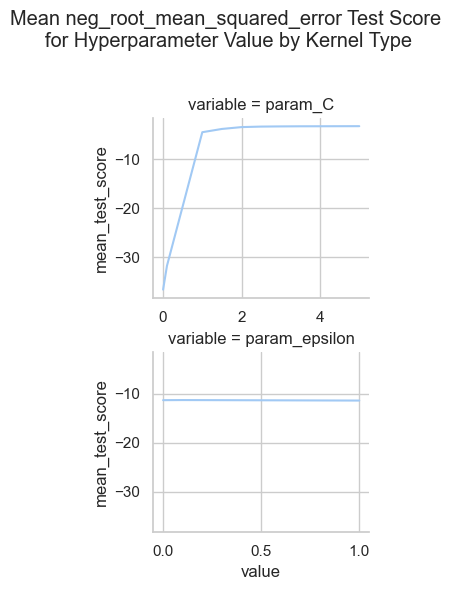

In [17]:
from IPython.display import display

def review_hyper_params(search_grid , hyper_param_names , measure_name ):
    ## Print best Parameters 
    print("Best Hyperparameter Combinations: \n" , search_grid.best_params_ , "\n")

    ## Convert grid results to a data frame 
    df = pd.DataFrame(search_grid.cv_results_)
    
    ## Setup key variables 
    vars = ["param_" + var for var in hyper_param_names]
    vars.append("mean_test_score")
    
    ## Convert data frame to long format for graphics 
    df_long = df[vars].melt(id_vars=[ "mean_test_score"])

    ## Create line plot for the variables 
    g = sns.FacetGrid(df_long, row='variable', sharex=False )
    g = g.map(sns.lineplot, 'value', 'mean_test_score', ci=None).add_legend()

    ## Add title to the plot
    g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
    g.fig.suptitle('Mean {} Test Score \nfor Hyperparameter Value by Kernel Type'.format(measure_name))

    ## Print the top ranking combinations 
    print("Top Parameter Combinations: ")
    vars.append("rank_test_score")
    display(df[vars].sort_values(by=['rank_test_score']).head(5))


review_hyper_params(svm_grid_search, ['C','epsilon'] , "neg_root_mean_squared_error")

#### Linear Regressor 


In [18]:
from sklearn.linear_model import LinearRegression


## Fit the data to the grid search 
linear_reg = LinearRegression().fit(X_train_scaled, y_train)


### Extract Model Formula

Not necessary for this assignment but could be a useful snippet for later. 

In [19]:
def print_reg_formula(X: pd.DataFrame , Y: pd.DataFrame ,  model ):
    strings = []
    for i,  col in enumerate(X.columns):
        coef = round(model.coef_[i] , 3)
        if coef < 0:
            strings.append(" - {0} {1}".format( abs(coef) , col) )
        else:
            strings.append(" + {0} {1}".format( coef , col) )
    inter = round(model.intercept_ , 2)
    print("------------ Model Formula: ------------ ")
    print("{0} = {1}{2}".format( Y.name, inter , "".join(strings)))
    print("---------------------------------------- ")
    print("At R-squared of {0}".format(model.score(X, Y)))
    print("---------------------------------------- ")


## Print the model equation and R squared value 
print_reg_formula(X_train , y_train , linear_reg)

------------ Model Formula: ------------ 
Compressive Strength (28-day)(Mpa) = 35.85 + 4.465 Cement - 2.018 Slag + 4.278 Fly ash - 4.831 Water + 0.329 SP - 5.313 Coarse Aggr. - 2.597 Fine Aggr.
---------------------------------------- 
At R-squared of -592877.388636631
---------------------------------------- 


C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Stochastic Gradient Descent Regressor 

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)

## Set up parameter grid 
param_grid = [
  {'alpha': [0.0001,0.001, 0.01, 0.1, 0.5  ], 
  'epsilon':[0.001, 0.01, 0.1, 1]},
 ]
 
 ## Establish the grid search 
sgd_grid_search = GridSearchCV( 
    sgd_reg,
    param_grid, 
    cv=3, 
    verbose=0,
    scoring='neg_root_mean_squared_error'
)

## Fit the data to the grid search 
sgd_grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=3, estimator=SGDRegressor(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],
                          'epsilon': [0.001, 0.01, 0.1, 1]}],
             scoring='neg_root_mean_squared_error')

Best Hyperparameter Combinations: 
 {'alpha': 0.001, 'epsilon': 0.01} 

Top Parameter Combinations: 


,param_alpha,param_epsilon,mean_test_score,rank_test_score
5,0.001,0.01,-3.037544,1
2,0.0001,0.1,-3.038177,2
0,0.0001,0.001,-3.038615,3
1,0.0001,0.01,-3.040682,4
3,0.0001,1,-3.040961,5


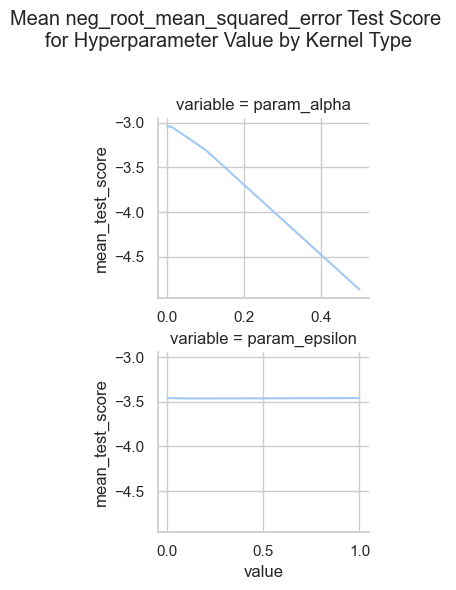

In [21]:
review_hyper_params(sgd_grid_search, ['alpha','epsilon'] , "neg_root_mean_squared_error")

### Evaluation & Comparison 

Train the base estimators and the Voting regressor on the training set and compare their predicted 28-day
Compressive Strength values for the test set. Report their RMSEs and illustrate the predicted values versus
the ground truth values of all the test instances.

 We can see that the Voting regression model has the lowest RMSE value at 2.046 followed by SGD regression(2.0608), Linear regression(2.0685), then SVM Regression(2.0942).

 This is to be expect as the ensemble method takes the average of the predictions.


In [22]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    # print('explained_variance: ', round(explained_variance,4))    
    # print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [23]:
svm_y_pred = svm_grid_search.predict(X_test_scaled)
linear_y_pred = linear_reg.predict(X_test_scaled)
sgd_y_pred = sgd_grid_search.predict(X_test_scaled)
voting_reg_pred = grid.predict(X_test_scaled)



print("--------- SVM Regression --------- ")
regression_results( y_test ,  svm_y_pred)

print("--------- Linear Regression --------- ")
regression_results( y_test ,  linear_y_pred)

print("--------- SGD Regression --------- ")
regression_results( y_test ,  sgd_y_pred)

print("--------- Voting Regression --------- ")
regression_results( y_test ,  voting_reg_pred )



--------- SVM Regression --------- 
MAE:  1.776
MSE:  4.3871
RMSE:  2.0945
--------- Linear Regression --------- 
MAE:  1.731
MSE:  4.2788
RMSE:  2.0685
--------- SGD Regression --------- 
MAE:  1.7306
MSE:  4.2468
RMSE:  2.0608
--------- Voting Regression --------- 
MAE:  1.6764
MSE:  4.1862
RMSE:  2.046


In [24]:
def plot_true_vs_pred(y_truth , pred , name = ""):
    x = np.array([y_truth.min() , y_truth.max() ])
    y = np.array([y_truth.min() , y_truth.max()])
    plt.figure()
    g = sns.scatterplot(pred , y_truth )
    sns.lineplot(x=x, y=y , color='r', linestyle="dashed")
    g.set_title(name + ': Regression Truth vs Prediction'  , fontsize=18)
    g.set_ylabel('Truth Value')
    g.set_xlabel('Predicted Value')
    plt.plot()



In [25]:
def plot_true_vs_pred_multi( models_df:pd.DataFrame , name="Regression "):

     y_truth = models_df["y_test"]
     pred = models_df["y_pred"]
     models = models_df["model"]

     x = np.array([y_truth.min() , y_truth.max() ])
     y = np.array([y_truth.min() , y_truth.max()])
     plt.figure()
     g = sns.scatterplot(pred , y_truth, models )
     sns.lineplot(x=x, y=y , color='r', linestyle="dashed")
     g.set_title(name + ' Truth vs Prediction'  , fontsize=18)
     g.set_ylabel('Truth Value')
     g.set_xlabel('Predicted Value')
     plt.plot()


C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


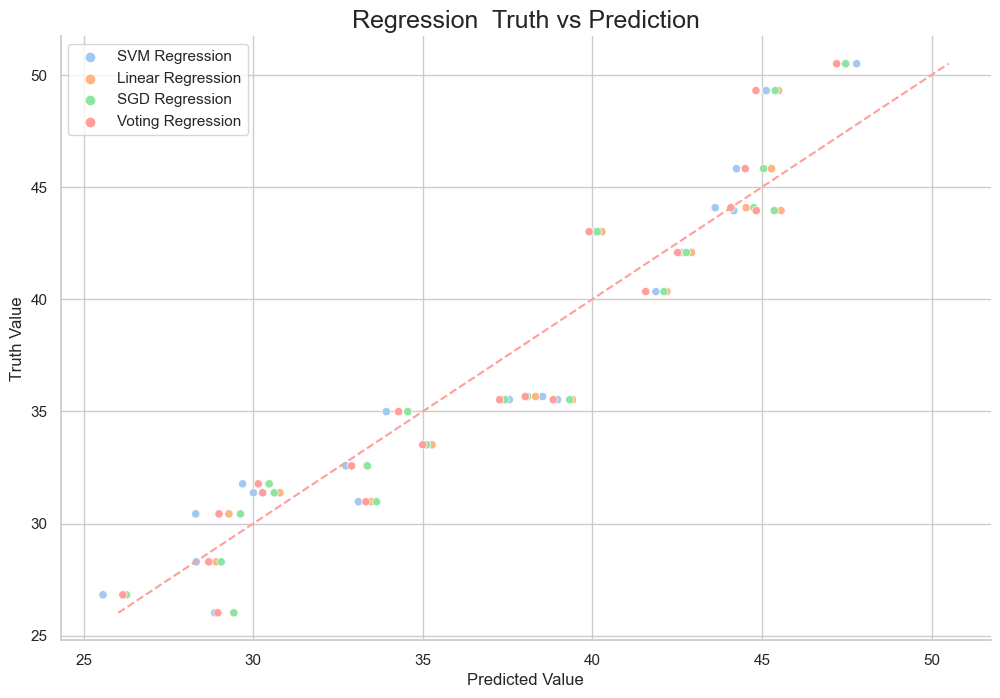

In [26]:
models = ["SVM Regression " , "Linear Regression" , "SGD Regression" , "Voting Regression" ]
preds = [svm_y_pred , linear_y_pred ,sgd_y_pred ,voting_reg_pred]


pred_dfs =  []
for model , pred in zip(models , preds):
    pred_dfs.append(pd.DataFrame({"y_test":y_test ,  "y_pred":pred , "model": [model for x in pred]}))

pred_df = pd.concat(pred_dfs  , ignore_index=True)
plot_true_vs_pred_multi(pred_df , "Regression ")



## Summary 

# Project 2: Abalone 

Predict the age of abalone from physical measurements

### Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description  
Sex / nominal / -- / M, F, and I (infant)  
Length / continuous / mm / Longest shell measurement  
Diameter / continuous / mm / perpendicular to length  
Height / continuous / mm / with meat in shell  
Whole weight / continuous / grams / whole abalone  
Shucked weight / continuous / grams / weight of meat  
Viscera weight / continuous / grams / gut weight (after bleeding)  
Shell weight / continuous / grams / after being dried  
Rings / integer / -- / +1.5 gives the age in years  

### Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

## Load Data & Inspect Data

In [27]:
## import training and testing data 
abalone_data= pd.read_csv("./abalone.data" , header=None)


In [28]:
## Give Columns meaningful names 
names = ["Sex","Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
names = [name.lower() for name in names]
abalone_data.set_axis(names, axis=1, inplace=True)

In [29]:
abalone_data.head(5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Check for Nulls 

There are no null values 

In [30]:
abalone_data.shape
abalone_data.info()

(4177, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Convert 'sex' variables to numbers 

In [31]:
encodings = []
for val in abalone_data["sex"].values:
    if val == "M":
        encodings.append(0)
    elif val == "F":
        encodings.append(1)
    elif val == "I":
        encodings.append(-1)
    else:
        raise Exception("incorrect values occurred") 

abalone_data["sex"] = encodings

In [32]:
abalone_data.head(5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,-1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Exploratory Data Analysis 

The data is reasonable well distributed as seen in the histograms. The boxplot shows there do seem to some outliers in the predictors and the rings variable seems to have a strong positive skew.

There are many variables that are highly correlated as seen in the correlation matrix. Some of these corelation may be understated as they do not follow a linear distribution as seen in the pairs plot. 

We can also see in the pairs plot numerous outliers - points very different to the trend. To increase the model performance these may need to be removed. 


In [33]:
abalone_data.describe()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,-0.008379,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,-1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,-1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'whole_weight'}>,
        <AxesSubplot:title={'center':'shucked_weight'}>],
       [<AxesSubplot:title={'center':'viscera_weight'}>,
        <AxesSubplot:title={'center':'shell_weight'}>,
        <AxesSubplot:title={'center':'rings'}>]], dtype=object)

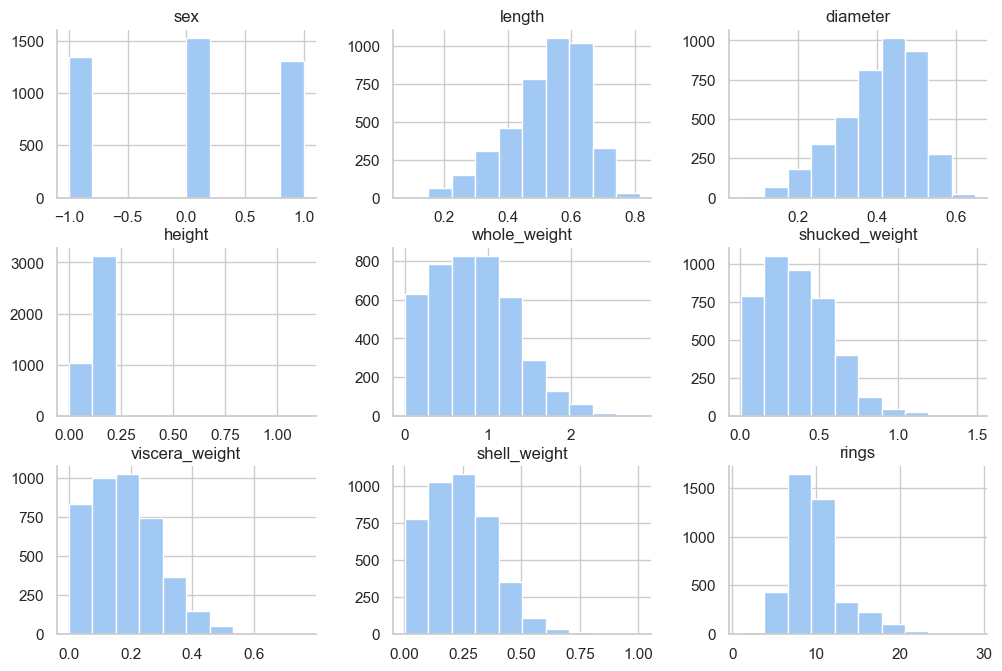

In [34]:
abalone_data.hist()

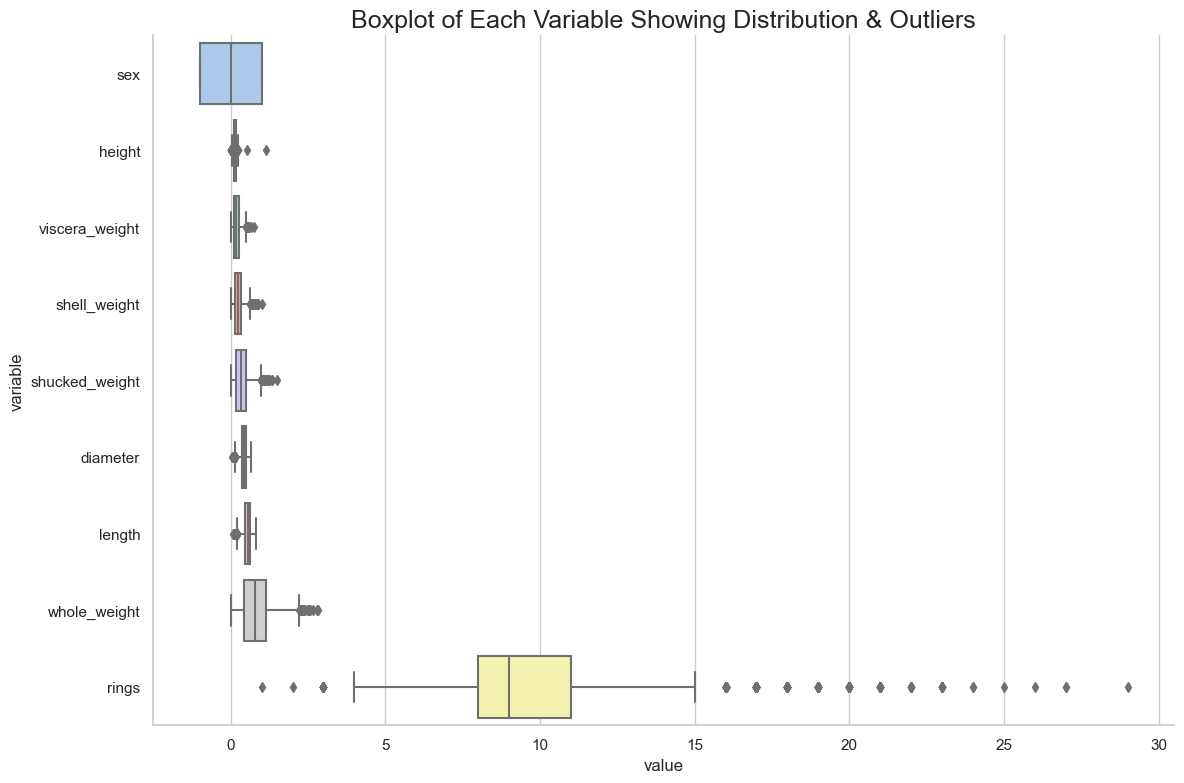

In [35]:
plot_boxplot_for_vars(abalone_data.columns , abalone_data)

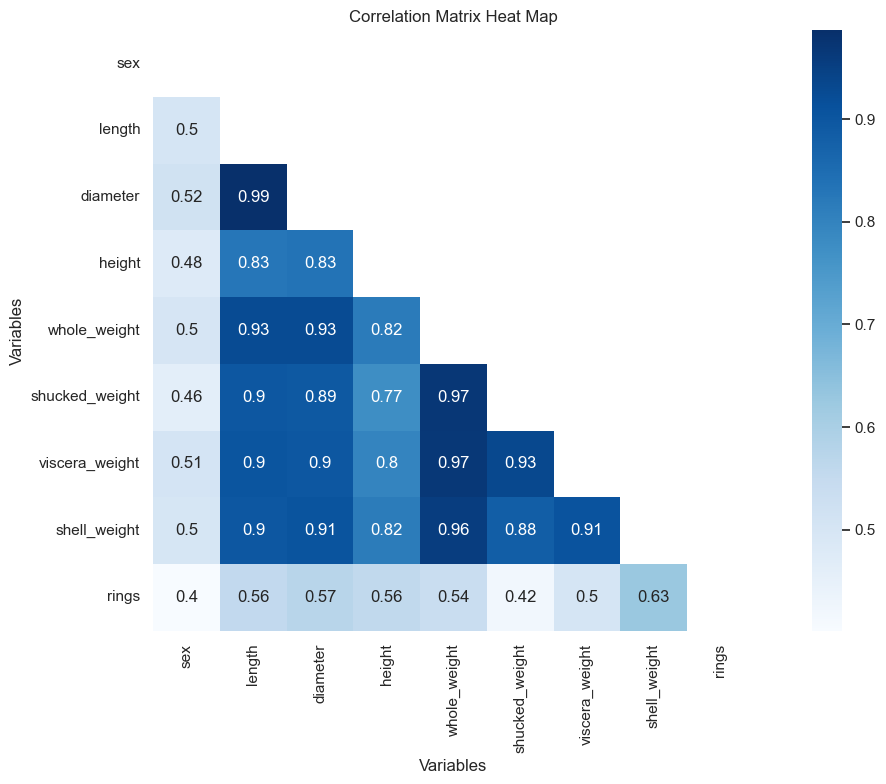

In [36]:
plot_correlation_matrix(abalone_data)

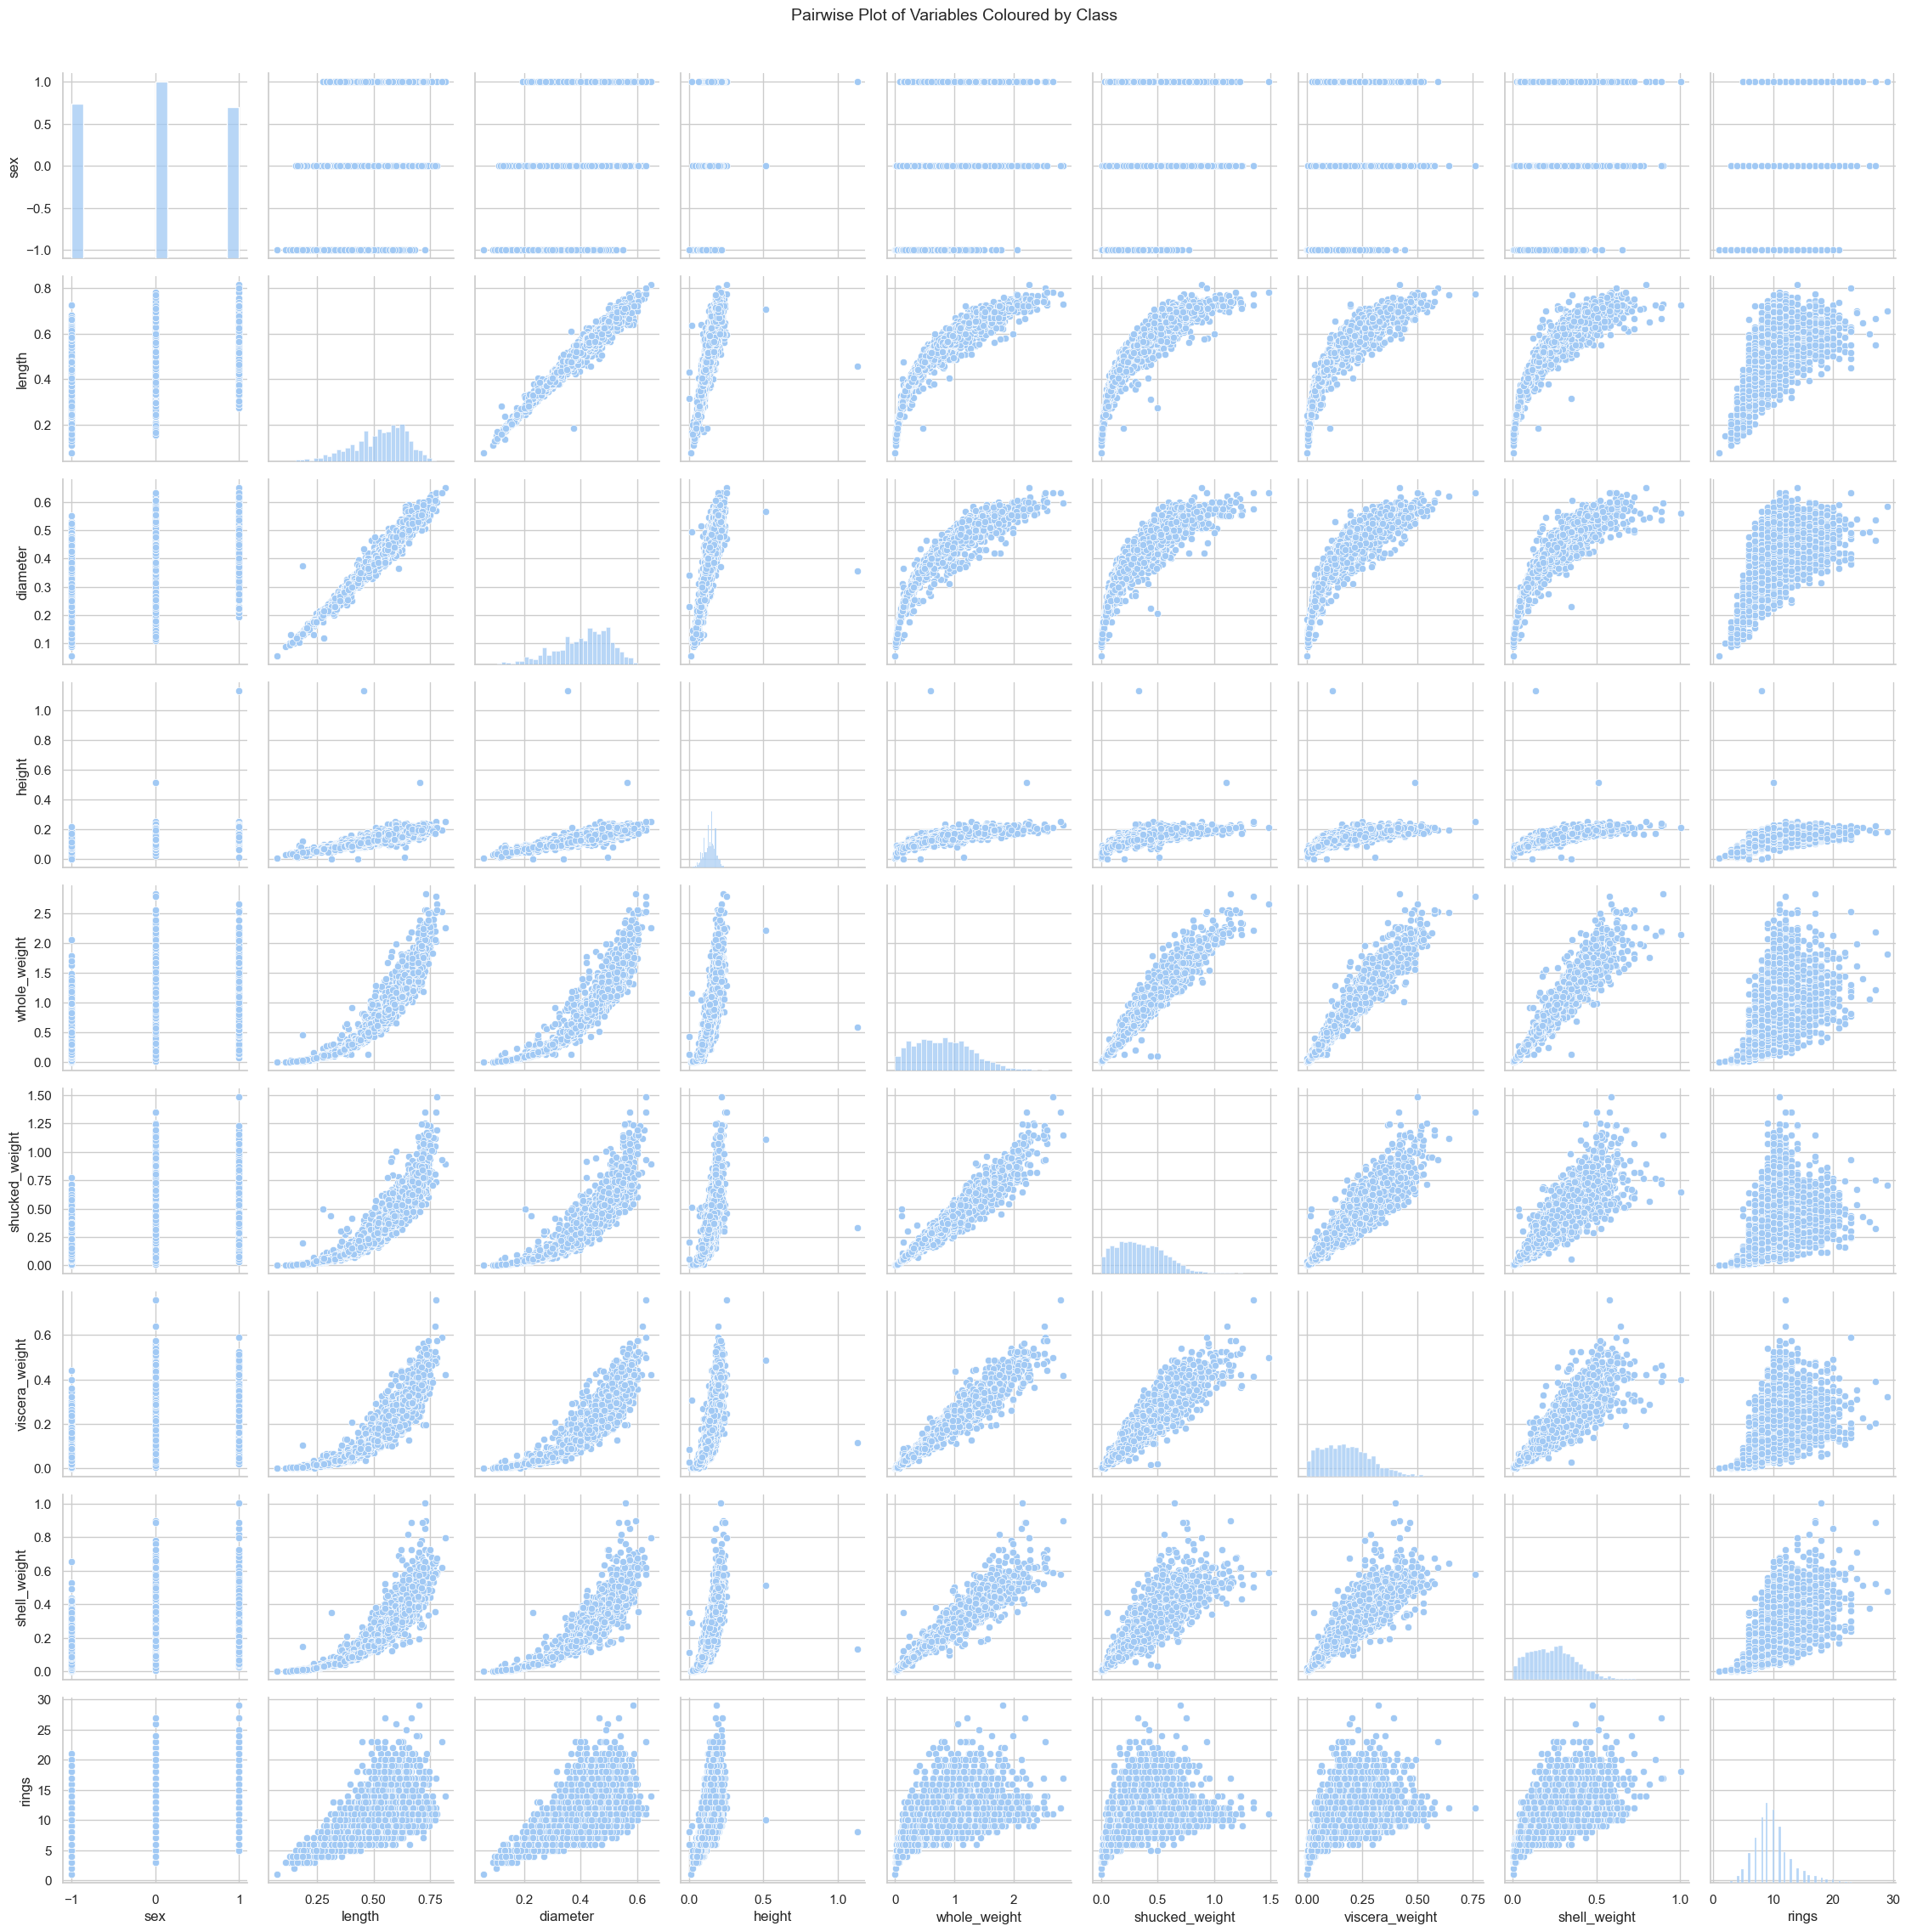

In [37]:
plot_pairwise(abalone_data)

## Extract Variables 

In [38]:
## Extract features and respond into variables 
abalone_response = "rings"
abalone_vars = [col for col in abalone_data if col != abalone_response]


## Data Cleaning 

## Training Split 

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(abalone_data[abalone_vars],
                                                    abalone_data[abalone_response],
                                                    test_size=0.15,
                                                    random_state=42)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Create pipline 
trans_pipeline = Pipeline([
    ("scale_values" , StandardScaler())
])

## Apply to training data & testing data 
X_train_scaled = trans_pipeline.fit_transform(X_train[abalone_vars])
X_test_scaled = trans_pipeline.transform(X_test[abalone_vars])


## Random Forest 
Implement a Random Forest regressor with 500 estimators. You can manually experiment with various hyperparameters such as min samples leaf, max features, max samples, bootstrap, etc. Train your Random Forest regressor on the training set and test it on the test set. Report its RMSE for the predictions on the test set. Note: as the ring values must be integers, the predicted results from your Random Forest regressor must be firstly rounded to the nearest integer before the RMSE computation.


In [40]:
from sklearn.ensemble import RandomForestRegressor

regr_forest = RandomForestRegressor( n_estimators=500 , min_samples_leaf = 2, bootstrap=True)

regr_forest.fit(X_train_scaled, y_train)
regr_y_pred = regr_forest.predict(X_test_scaled)
regr_y_pred = [int(round(pred, 0 )) for pred in regr_y_pred]

RandomForestRegressor(min_samples_leaf=2, n_estimators=500)

### Model Evaluation 

C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


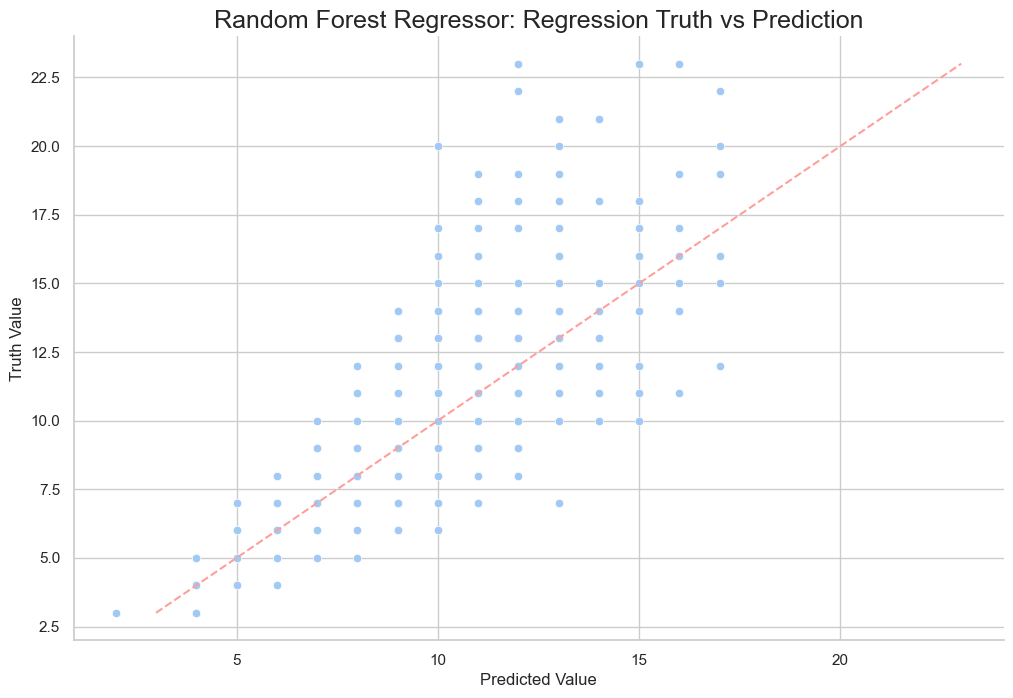

In [41]:
plot_true_vs_pred(y_test , regr_y_pred , "Random Forest Regressor" )

In [42]:
print("--------- Random Forest Reg --------- ")
regression_results(regr_y_pred, y_test)

--------- Random Forest Reg --------- 
MAE:  1.5024
MSE:  4.7815
RMSE:  2.1867


### Feature Importance 

Use the feature importances obtained from the training process to trim the feature dimension of the data. In your Python code, you should retain only those features whose importance values are above 5% (i.e., 0.05)1
You can either write your own Python code or use the function SelectFromModel from the sklearn.feature selection package to work out which feature(s) can be removed.
Report what features were retained and what features were removed in the above process. What is the total feature importance value that is retained after your dimension reduction step?


In [43]:
def find_low_importance(colnames, importances, threshold):
    combined = zip(colnames, importances)
    low_importance = []
    for name, score in combined:
        if score < threshold:
            low_importance.append(name)
    
    return low_importance

importances = regr_forest.feature_importances_
low_importance = find_low_importance( abalone_vars, importances, 0.05)

scores_all = []
scores_important = []

print("---------- Feature importance -------------")
# Subsetting importance predictors
for name,importance in zip(abalone_vars, importances):
    print(name,importance)
    scores_all.append(importance)
    if importance > 0.05:
        scores_important.append(importance)
print("---------------------------------------")
print("Removed if importance > 0.05")
print("Total importance before: ", len(scores_all))
print("Total importance: ", sum(scores_all))
print("Total importance after dropping vars: ", len(scores_important))
print("Total importance after dropping vars: ", round(sum(scores_important), 3) )
print("Dropped Vars are: ", low_importance)
print("---------------------------------------")

---------- Feature importance -------------
sex 0.028099793146224673
length 0.04415452263725477
diameter 0.053081163244021484
height 0.04844570233089698
whole_weight 0.0794872050446051
shucked_weight 0.16578050755765927
viscera_weight 0.06451355486007032
shell_weight 0.5164375511792674
---------------------------------------
Removed if importance > 0.05
Total importance before:  8
Total importance:  1.0
Total importance after dropping vars:  5
Total importance after dropping vars:  0.879
Dropped Vars are:  ['sex', 'length', 'height']
---------------------------------------


## Repeated Modeling on Reduced Data 

Repeat the training and prediction processes above on the reduced-dimensional data. We expect to see a
slight increase of RMSE for the reduced-dimensional data. In many real applications, the feature dimension
of the data may be reduced drastically with only a slight increase in the prediction error. We won’t see this
in this small dataset as the feature dimension is already quite small.


In [44]:
## Drop low importance vars 
train_new = X_train.drop(low_importance,1)
test_new = X_test.drop(low_importance,1)

# Deleting low-importance features from the set
x_train_new = trans_pipeline.fit_transform(train_new )
x_test_new = trans_pipeline.transform(test_new )

C:\Users\david\AppData\Local\Temp\ipykernel_39680\639069760.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_new = X_train.drop(low_importance,1)
C:\Users\david\AppData\Local\Temp\ipykernel_39680\639069760.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_new = X_test.drop(low_importance,1)


In [45]:
## Checl columns have been dropped
train_new.columns 
X_train.columns

Index(['diameter', 'whole_weight', 'shucked_weight', 'viscera_weight',
       'shell_weight'],
      dtype='object')

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight'],
      dtype='object')

In [46]:
regr_forest_reduced = RandomForestRegressor( n_estimators=500 , min_samples_leaf = 2, bootstrap=True)

regr_forest_reduced.fit(x_train_new, y_train)
regr_red_y_pred = regr_forest_reduced.predict(x_test_new)
regr_red_y_pred = [int(round(pred, 0 )) for pred in regr_red_y_pred]

RandomForestRegressor(min_samples_leaf=2, n_estimators=500)

## Model Comparison

The random forrest without the variables with low importance scores has a higher RMSE of 2.2167 as opposed to 2.1867 meaning the full model is performing better. 

The error is significantly larger for abalone with a large number of rings. This is most likely due to the distribution of data that can be seen in the pairs plot. Lower values tend to have a tighter distributution of values than higher ones across variables. This does not seem to be an issue with data representation of either class. 


In [47]:
print("--------- Random Forest Reg --------- ")
regression_results(regr_y_pred, y_test)

print("--------- Random Forest Reg Reduced --------- ")
regression_results(regr_red_y_pred, y_test)

--------- Random Forest Reg --------- 
MAE:  1.5024
MSE:  4.7815
RMSE:  2.1867
--------- Random Forest Reg Reduced --------- 
MAE:  1.5008
MSE:  4.9139
RMSE:  2.2167


<Figure size 1200x800 with 0 Axes>

[]

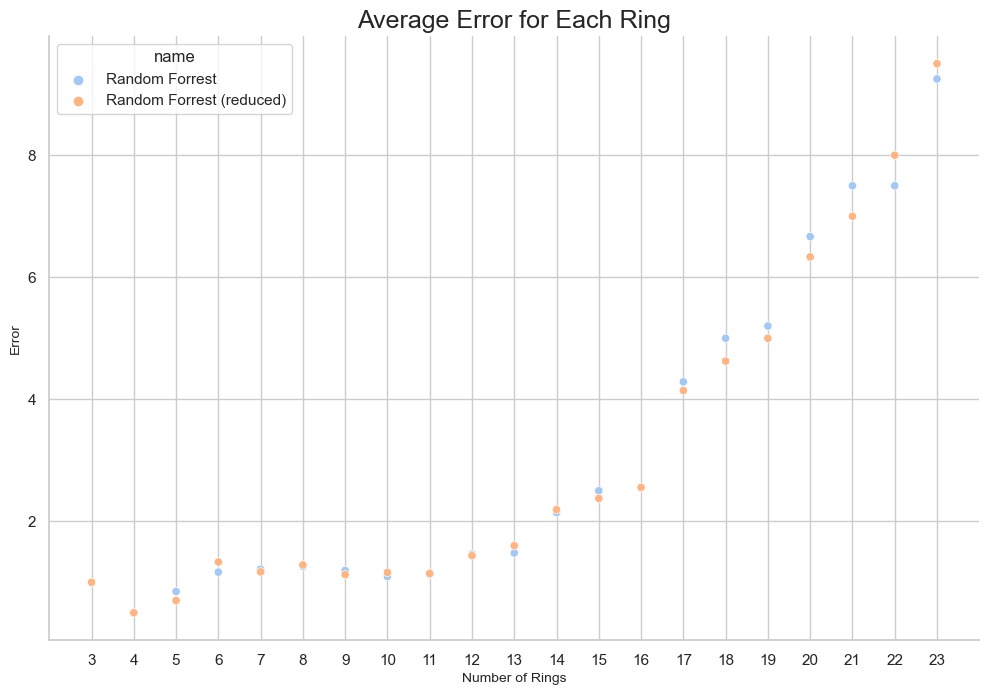

In [48]:
def plot_errors( y_test, y_pred ):

    df = pd.DataFrame({
        "true" : np.array(y_test),
        "pred" : np.array(y_pred)
    } )

    errors = []
    for index, row in df.iterrows():
        error = row['true'] - row['pred'] 
        errors.append( abs( error))

    df["error"] = errors

    rings = df["true"].unique()

    ave_error = []
    for ring in rings: 
        er = []
        for index, row in df.iterrows():
            if row["true"]  == ring:
                er.append(row["error"] )
        ave_error.append(np.average(er))

    ave_df = pd.DataFrame({"ring":rings , "ave_error":ave_error})
    return ave_df


df_1 = plot_errors(y_test, regr_y_pred  )
df_2 = plot_errors(y_test, regr_red_y_pred ) 


df_1["name"] = ["Random Forrest" for x in range(0, len(df_1 ))]
df_2["name"]= ["Random Forrest (reduced)" for x  in range(0, len(df_2 ))]

join_df = pd.concat([df_1 ,df_2] ,  ignore_index=True  )

# Plots
plt.figure()
p = sns.scatterplot(y = join_df ["ave_error"], x = join_df ["ring"] , hue=join_df["name"])
# p = sns.scatterplot(data=ave_error, y = "ave_error", x = "ring")
x = p.set_title("Average Error for Each Ring",  fontsize=18)
# Tick labels
x = p.set_xticks(join_df ["ring"].sort_values( ).unique() )
x = p.set_xticklabels(join_df ["ring"].sort_values( ).unique())
# Text
x = p.set_xlabel("Number of Rings", fontsize = 10)
x = p.set_ylabel("Error", fontsize = 10)
plt.plot()

C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


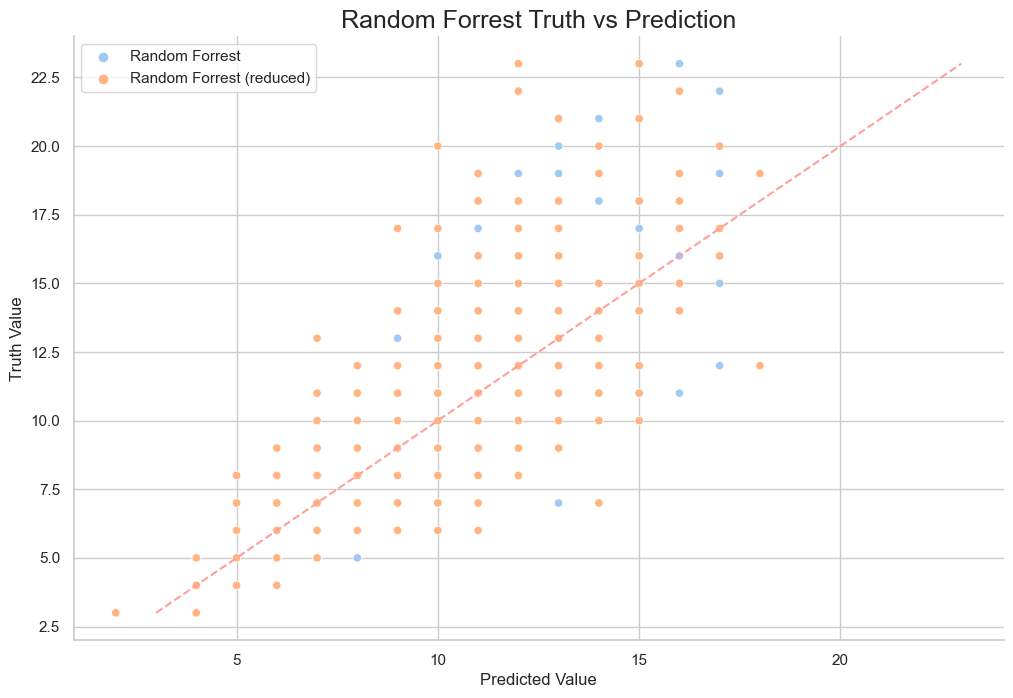

In [49]:
models = ["Random Forrest" , "Random Forrest (reduced)"]
preds = [regr_y_pred , regr_red_y_pred]


pred_dfs =  []
for model , pred in zip(models , preds):
    pred_dfs.append(pd.DataFrame({"y_test":y_test ,  "y_pred":pred , "model": [model for x in pred]}))

pred_df = pd.concat(pred_dfs  , ignore_index=True)
plot_true_vs_pred_multi(pred_df ,"Random Forrest" )


## Bagged Regressor SVM



In [50]:
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor
from sklearn.svm import SVR

regr_bag= BaggingRegressor(
    SVR(C=0.1 , epsilon=0.1 , kernel="linear"), #kernel set to linear for speed
     n_estimators=500 , 
     bootstrap=True)

regr_bag.fit(X_train_scaled, y_train)
bag_y_pred = regr_bag.predict(X_test_scaled)
bag_y_pred = [int(round(pred, 0 )) for pred in bag_y_pred]

BaggingRegressor(base_estimator=SVR(C=0.1, kernel='linear'), n_estimators=500)

In [51]:
print("---------Bagged Regressor --------- ")
regression_results(bag_y_pred, y_test)

---------Bagged Regressor --------- 
MAE:  1.5327
MSE:  5.2616
RMSE:  2.2938


C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


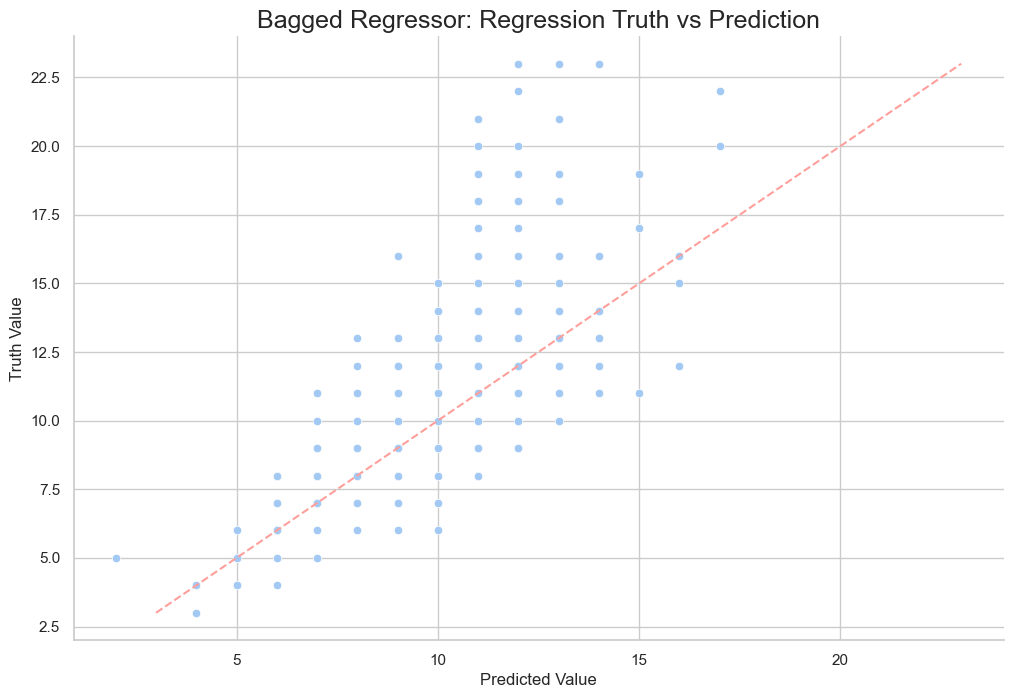

In [52]:
plot_true_vs_pred(y_test , bag_y_pred , "Bagged Regressor" )

## Model Comparison 

The full random forrest model has the lowest RMSE at 2.1867 and therefore works best for the data. 

All models tend to struggle with the abalone with a greater number of rings. The bagged regressor seemed to particularly struggle with middle range values. 

In [53]:
print("--------- Random Forest Reg --------- ")
regression_results(regr_y_pred, y_test)

print("--------- Random Forest Reg Reduced --------- ")
regression_results(regr_red_y_pred, y_test)

print("---------Bagged Regressor --------- ")
regression_results(bag_y_pred, y_test)

--------- Random Forest Reg --------- 
MAE:  1.5024
MSE:  4.7815
RMSE:  2.1867
--------- Random Forest Reg Reduced --------- 
MAE:  1.5008
MSE:  4.9139
RMSE:  2.2167
---------Bagged Regressor --------- 
MAE:  1.5327
MSE:  5.2616
RMSE:  2.2938


C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


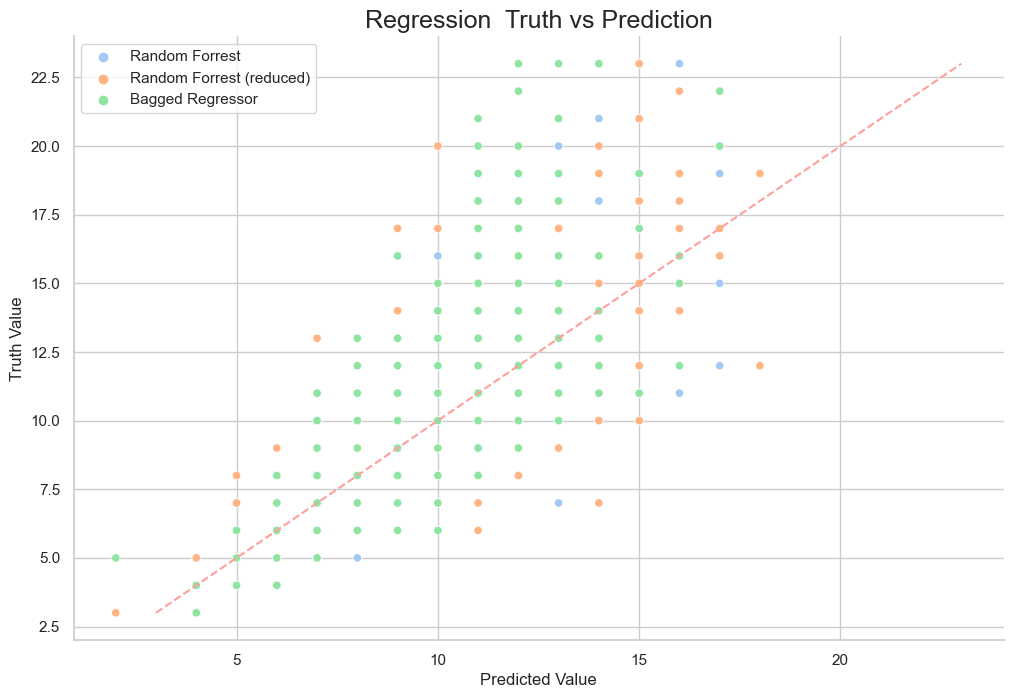

In [54]:
models = ["Random Forrest" , "Random Forrest (reduced)" , "Bagged Regressor"]
preds = [regr_y_pred , regr_red_y_pred, bag_y_pred]


pred_dfs =  []
for model , pred in zip(models , preds):
    pred_dfs.append(pd.DataFrame({"y_test":y_test ,  "y_pred":pred , "model": [model for x in pred]}))

pred_df = pd.concat(pred_dfs  , ignore_index=True)
plot_true_vs_pred_multi(pred_df)

<Figure size 1200x800 with 0 Axes>

[]

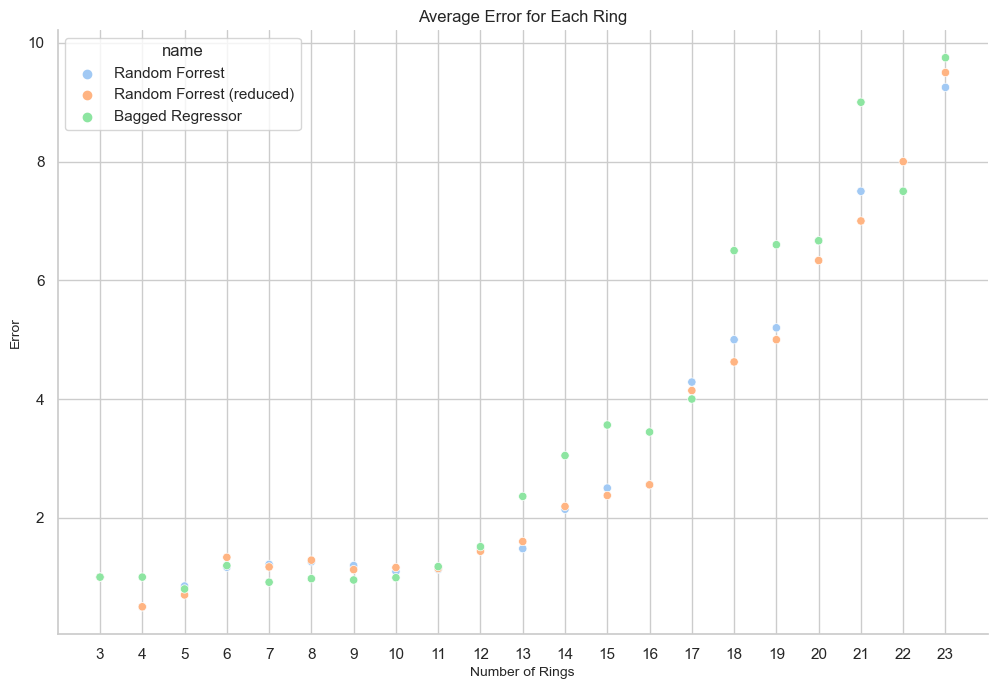

In [55]:
df_1 = plot_errors(y_test, regr_y_pred )
df_2 = plot_errors(y_test, regr_red_y_pred ) 
df_3 = plot_errors(y_test, bag_y_pred ) 


df_1["name"] = ["Random Forrest" for x in range(0, len(df_1 ))]
df_2["name"]= [ "Random Forrest (reduced)"for x  in range(0, len(df_2 ))]
df_3["name"]= ["Bagged Regressor"for x  in range(0, len(df_3 ))]

join_df = pd.concat([df_1 ,df_2 , df_3] ,  ignore_index=True  )

# Plots
plt.figure()
p = sns.scatterplot(y = join_df ["ave_error"], x = join_df ["ring"] , hue=join_df["name"])
# p = sns.scatterplot(data=ave_error, y = "ave_error", x = "ring")
x = p.set_title("Average Error for Each Ring")
# Tick labels
x = p.set_xticks(join_df ["ring"].sort_values( ).unique() )
x = p.set_xticklabels(join_df ["ring"].sort_values( ).unique())
# Text
x = p.set_xlabel("Number of Rings", fontsize = 10)
x = p.set_ylabel("Error", fontsize = 10)
plt.plot()

## References 

1. Data used for project 1:
 Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.



abalone 
1. Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)
 